In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import scipy.stats as stats

In [3]:
df = pd.read_csv("Two+Machines.csv")
df.head()

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1


### Two sample z-test

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volume   200 non-null    float64
 1   Machine  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [5]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


In [6]:
df.groupby("Machine")['Volume'].mean()

Machine
Machine 1    151.2039
Machine 2    151.8728
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Machine', ylabel='Volume'>

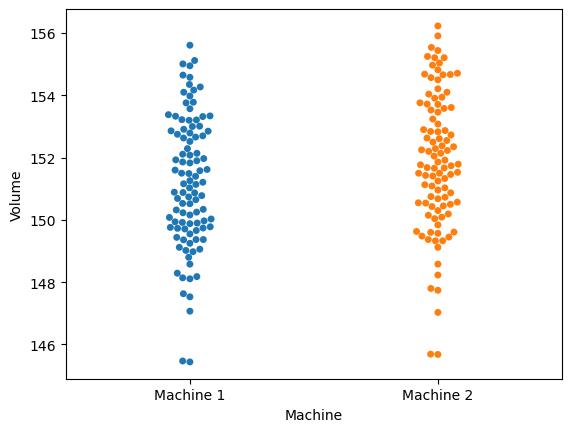

In [7]:
sns.swarmplot(x = "Machine",
              y = 'Volume',
              data = df)

<AxesSubplot:xlabel='Machine', ylabel='Volume'>

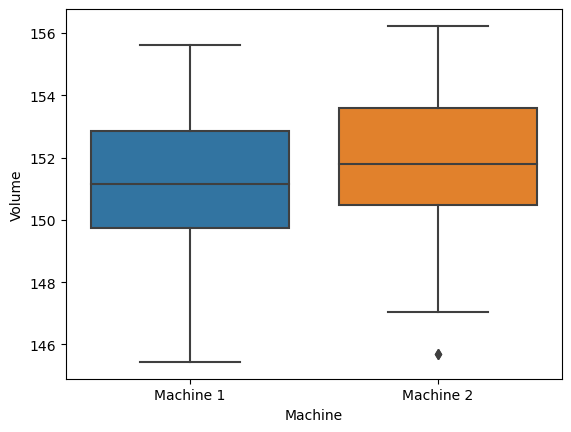

In [8]:
sns.boxplot(x = "Machine",
              y = 'Volume',
              data = df)

In [15]:
m1 = df.loc[df.Machine == 'Machine 1', 'Volume']
m2 = df.loc[df.Machine == 'Machine 2', 'Volume']

statistic = weightstats.ztest(m1, m2)
print(f"z-statistic: {statistic[0]}, p-value: {statistic[1]}")

# Reject the null hypothesis that means are same

z-statistic: -2.189406040190184, p-value: 0.028567341032618248


In [17]:
stats.ttest_ind(m1, m2, equal_var=True) # we can do t-test as well

Ttest_indResult(statistic=-2.189406040190184, pvalue=0.029736299645472124)

### Two-sample z-test using tips dataset

In [21]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [24]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


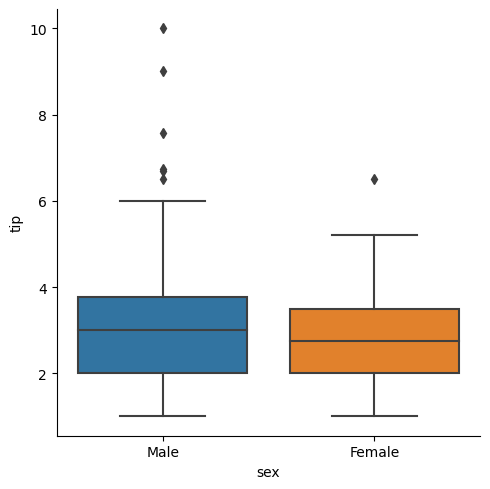

In [25]:
sns.catplot(x = 'sex',
            y = 'tip',
            kind = 'box',
            data = tips)

In [26]:
# H0: Male mean tip = Female mean tip
# OR Male mean tip - Female mean tip = 0

# Ha: Male mean tip != Female mean tip

tm = tips.loc[tips.sex == "Male", 'tip']
tf = tips.loc[tips.sex == "Female", 'tip']

statistic = weightstats.ztest(tm, tf)
print(f"z-statistic: {statistic[0]}, p-value: {statistic[1]}")

# Failed to reject null hypothesis (p-value>0.05)


z-statistic: 1.3878597054212687, p-value: 0.1651797698624794


### Two sample t-test using Python

# Variance is equal

Samples from two machines A and B have the following volumes in bottles (assume equal variance)

* Machine A: 150, 152, 154, 152, 151
* Machine B: 156, 155, 158, 155, 154

Is the mean different? (95% confidence)

In [3]:
# H0: mean(m1) = mean(m2)
# Ha: mean(m1) != mean(m2)

m1 = [150, 152, 154, 152, 151]
m2 = [156, 155, 158, 155, 154]

stats.ttest_ind(m1, m2, equal_var = True)

# Reject null hypothesis


Ttest_indResult(statistic=-4.005551702879929, pvalue=0.003919295477128331)

# Variance is unequal

Samples from two machines A and C have the following volumes in bottles (assume equal variance)

* Machine A: 150, 152, 154, 152, 151
* Machine C: 144, 162, 177, 150, 140

Is the mean different? (95% confidence)

In [6]:
# H0: mean(m1) = mean(m2)
# Ha: mean(m1) != mean(m2)

m1 = [150, 152, 154, 152, 151]
m3 = [144, 152, 177, 150, 140]

stats.ttest_ind(m1, m3, equal_var = False)

# Accept null hypothesis

Ttest_indResult(statistic=-0.12314981436141322, pvalue=0.9078115685018249)

### Paired t-Test in Python

In [7]:
# Ho: BP_before = BP_after
# Ha: BP_before != BP_after

bp_before = [120, 122, 143, 100, 109]
bp_after = [122, 120, 141, 109, 109]

stats.ttest_rel(bp_before, bp_after)
# Failed to reject null hypothesis

Ttest_relResult(statistic=-0.6864064729836442, pvalue=0.5301776477578163)

### Two proportion test using Python

In [3]:
from statsmodels.stats import proportion

In [6]:
# Sample A: 30 defectie out of 200
# sample B: 10 defective out of 100

proportion.test_proportions_2indep(30, 200, 10, 100, method = 'score')

# Failed to reject null hypothesis

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.1989578808281796
pvalue = 0.2305443235633593
compare = 'diff'
method = 'score'
variance = 0.001739130434782609
alternative = 'two-sided'
prop1_null = 0.13333333333333333
prop2_null = 0.13333333333333333
tuple = (1.1989578808281796, 0.2305443235633593)
diff = 0.04999999999999999
ratio = 1.4999999999999998
odds_ratio = 1.588235294117647
value = 0

### Two Variance Test using Python

##### Example 1

We took 8 samples from machine A and standard deviation was 1.1. For machine B we took 5 samples and the variance was 11. Is there a defference in variance at 90% confidence level?

In [ ]:
# Ho: var1 = var2
# Ha: var1 != var2

In [7]:
F_cal = 11/(1.1**2)
F_cal

9.09090909090909

In [8]:
from scipy.stats import f

In [10]:
# critical f value on the right side
f.isf(0.05, dfn = 4, dfd = 7)

4.120311726897633

In [13]:
# critical f value on the left side
f.isf(0.95, dfn = 4, dfd = 7)

0.1640901524729093

As the fcal > fcritical thus reject null hypothesis

##### Example 2

In [17]:
m1 = [150, 150, 151, 148, 151, 152, 149, 150]
m2 = [135, 152, 154, 169, 157]

In [18]:
np.std(m1)

1.165922381636102

In [19]:
np.std(m2)

10.9288608738514

In [20]:
# Has an suumption
# m1 and m2 samples should be normality distributes
stats.bartlett(m1, m2)

BartlettResult(statistic=19.105727631632714, pvalue=1.2367317910523616e-05)

In [21]:
# Robust test
stats.levene(m1, m2)

LeveneResult(statistic=5.416245804750017, pvalue=0.040060452607943706)

### ANOVA using python

In [2]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [3]:
stats.f_oneway(m1, m2, m3)

# Reject null hypothesis
# Atleast one machine's mean is different from others

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

In [4]:
import statsmodels.stats.oneway as oneway

In [6]:
oneway.anova_oneway((m1,m2,m3), use_var = 'equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

### ANOVA using mpg dataset

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [32]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
mpg.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [13]:
mpg.groupby(['origin', 'cylinders'])['mpg'].mean()

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

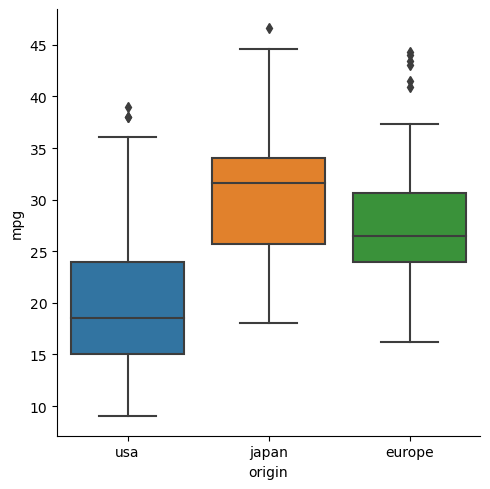

In [24]:
%matplotlib inline

sns.catplot(x = 'origin',
            y = 'mpg',
            data = mpg,
            kind = 'box')

In [33]:
# Lets compare 4 cylinders
mpg4 = mpg.loc[mpg['cylinders']==4, :]

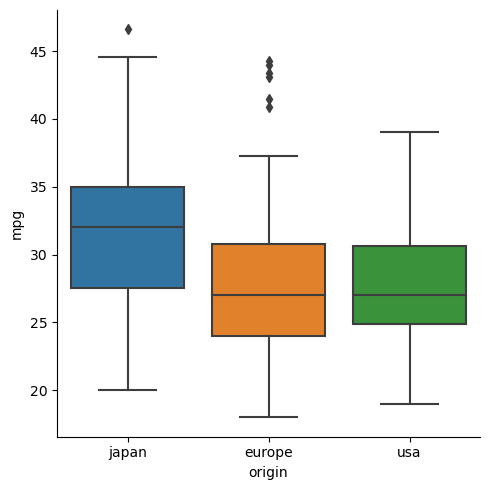

In [34]:
%matplotlib inline

sns.catplot(x = 'origin',
            y = 'mpg',
            data = mpg4,
            kind = 'box')

In [39]:
eu = mpg.loc[(mpg['cylinders']==4) & (mpg['origin']=='europe'), 'mpg']
usa = mpg.loc[(mpg['cylinders']==4) & (mpg['origin']=='usa'), 'mpg']
japan = mpg.loc[(mpg['cylinders']==4) & (mpg['origin']=='japan'), 'mpg']

In [41]:
oneway.anova_oneway((eu, usa, japan))

# Reject null hypothesis

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 10.32754521025997
pvalue = 6.955627950266431e-05
df = (2.0, 127.82531832310411)
df_num = 2.0
df_denom = 127.82531832310411
nobs_t = 204.0
n_groups = 3
means = array([28.41111111, 27.84027778, 31.59565217])
nobs = array([63., 72., 69.])
vars_ = array([41.50584229, 20.6984957 , 29.54777494])
use_var = 'unequal'
welch_correction = True
tuple = (10.32754521025997, 6.955627950266431e-05)

### Post Hoc Test (Tuckey's HSD Test)

Post hoc tests attemp to control the experimentwise error rate (usually alpha = 0.05) just like one way ANOVA is used instead of multiple t-tests.

In [42]:
import statsmodels.stats.oneway as oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [44]:
df4 = mpg.loc[mpg['cylinders']==4, ['mpg', 'origin']]

In [48]:
result = pairwise_tukeyhsd(df4['mpg'], df4['origin'], alpha = 0.05)

In [49]:
print(result)

# There is a significant difference between europe and japan
# There is a significant difference between japan and usa

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
europe  japan   3.1845  0.003  0.9267  5.4423   True
europe    usa  -0.5708 0.8186 -2.8061  1.6644  False
 japan    usa  -3.7554 0.0002 -5.9382 -1.5726   True
----------------------------------------------------


In [54]:
# Try m1, m2, and m3 comparision

m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

m1 = pd.DataFrame(data = {'volume': m1, 'machine': 'machine1'})
m2 = pd.DataFrame(data = {'volume': m2, 'machine': 'machine2'})
m3 = pd.DataFrame(data = {'volume': m3, 'machine': 'machine3'})

m13 = pd.concat([m1, m2, m3])
m13.head()

,volume,machine
0,150,machine1
1,151,machine1
2,152,machine1
3,152,machine1
4,151,machine1


In [55]:
result = pairwise_tukeyhsd(m13['volume'], m13['machine'], alpha = 0.05)
print(result)

# Significant difference found between machine1 and machine3
# Significant difference found between machine2 and machine3

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
machine1 machine2  -0.1667  0.976 -2.2277 1.8944  False
machine1 machine3      4.5 0.0001  2.4389 6.5611   True
machine2 machine3   4.6667 0.0001  2.6056 6.7277   True
-------------------------------------------------------


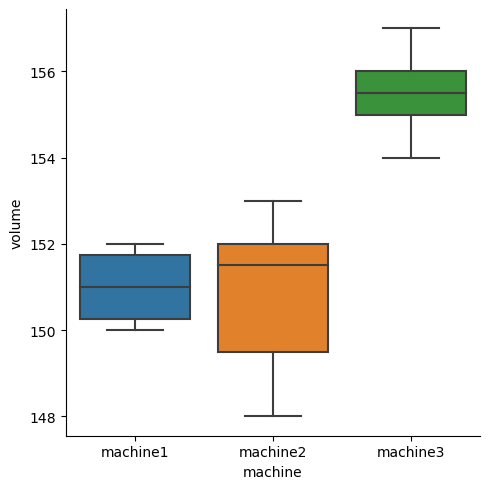

In [56]:
sns.catplot(data = m13,
            x = 'machine',
            y = 'volume',
            kind = 'box')